<a href="https://colab.research.google.com/github/c-susan/datasci_3_eda/blob/main/hha507assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load Packages

In [ ]:
!pip install pandas_profiling

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport

<ipython-input-4-fda579b4c779>:6: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


## Loading and Cleaning Dataset

In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/c-susan/datasci_3_eda/main/datasets/medicare_telehealth_trends_q12023.csv')

In [7]:
# Checking for number of rows and columns
print(f'Rows: {df.shape[0]}')
print(f'Columns: {df.shape[1]}')

Rows: 19264
Columns: 13


In [8]:
# Preview of data
df.sample(10)

,Year,quarter,Bene_Geo_Desc,Bene_Mdcd_Mdcr_Enrl_Stus,Bene_Race_Desc,Bene_Sex_Desc,Bene_Mdcr_Entlmt_Stus,Bene_Age_Desc,Bene_RUCA_Desc,Total_Bene_TH_Elig,Total_PartB_Enrl,Total_Bene_Telehealth,Pct_Telehealth
15223,2022,3,New Jersey,All,Black/African American,All,All,All,All,51422.0,67701.0,9242.0,0.1797
14232,2022,2,South Carolina,All,Non-Hispanic White,All,All,All,All,409712.0,500612.0,35803.0,0.0874
9650,2021,4,Alabama,All,Other/Unknown,All,All,All,All,NaN,NaN,NaN,NaN
16031,2022,4,Louisiana,All,All,All,All,0-64,All,39290.0,54737.0,5629.0,0.1433
17899,2022,Overall,Texas,All,All,All,All,All,Urban,1478196.0,1530299.0,481915.0,0.3260
13461,2022,2,Georgia,All,All,All,All,All,Unknown,NaN,NaN,NaN,NaN
9891,2021,4,Idaho,All,All,All,All,All,Unknown,NaN,NaN,NaN,NaN
6722,2021,1,Nebraska,All,All,All,All,All,All,173192.0,242982.0,22313.0,0.1288
818,2020,1,New York,All,Hispanic,All,All,All,All,88863.0,126267.0,9304.0,0.1047
12759,2022,1,Nevada,All,All,All,All,0-64,All,17777.0,25166.0,6320.0,0.3555


In [9]:
# Cleaning column names
columnNames = list(df)
df.columns = [name.strip().lower() for name in columnNames]
df

,year,quarter,bene_geo_desc,bene_mdcd_mdcr_enrl_stus,bene_race_desc,bene_sex_desc,bene_mdcr_entlmt_stus,bene_age_desc,bene_ruca_desc,total_bene_th_elig,total_partb_enrl,total_bene_telehealth,pct_telehealth
0,2020,1,Alabama,All,All,All,Aged,All,All,321952.0,410710.0,16321.0,0.0507
1,2020,1,Alabama,All,All,All,All,0-64,All,68081.0,93955.0,5254.0,0.0772
2,2020,1,Alabama,All,All,All,All,65-74,All,163291.0,217543.0,8652.0,0.0530
3,2020,1,Alabama,All,All,All,All,75-84,All,113008.0,136957.0,5712.0,0.0505
4,2020,1,Alabama,All,All,All,All,85 and over,All,49169.0,59755.0,2178.0,0.0443
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19259,2023,1,Wyoming,All,Hispanic,All,All,All,All,2476.0,3786.0,213.0,0.0860
19260,2023,1,Wyoming,All,Non-Hispanic White,All,All,All,All,59795.0,89194.0,4813.0,0.0805
19261,2023,1,Wyoming,All,Other/Unknown,All,All,All,All,NaN,NaN,NaN,NaN
19262,2023,1,Wyoming,Medicare & Medicaid,All,All,All,All,All,7781.0,10302.0,1373.0,0.1765


In [10]:
# Look for missingness in data
df.isnull().sum()

year                           0
quarter                        0
bene_geo_desc                  0
bene_mdcd_mdcr_enrl_stus       0
bene_race_desc                 0
bene_sex_desc                  0
bene_mdcr_entlmt_stus          0
bene_age_desc                  0
bene_ruca_desc                 0
total_bene_th_elig          2040
total_partb_enrl            2040
total_bene_telehealth       2058
pct_telehealth              2061
dtype: int64

In [11]:
df.dtypes

year                          int64
quarter                      object
bene_geo_desc                object
bene_mdcd_mdcr_enrl_stus     object
bene_race_desc               object
bene_sex_desc                object
bene_mdcr_entlmt_stus        object
bene_age_desc                object
bene_ruca_desc               object
total_bene_th_elig          float64
total_partb_enrl            float64
total_bene_telehealth       float64
pct_telehealth              float64
dtype: object

In [12]:
# Converting the 'year' column to a string variable instead of an integer.
df['year'] = df['year'].astype(str)
df.dtypes

year                         object
quarter                      object
bene_geo_desc                object
bene_mdcd_mdcr_enrl_stus     object
bene_race_desc               object
bene_sex_desc                object
bene_mdcr_entlmt_stus        object
bene_age_desc                object
bene_ruca_desc               object
total_bene_th_elig          float64
total_partb_enrl            float64
total_bene_telehealth       float64
pct_telehealth              float64
dtype: object

**____________________________________________________________________________________________________________**

# **1. Univariate Analysis**

>Performing a univariate analysis of each numerical variable



In [16]:
# Summary of statistical measures
df[['total_bene_th_elig','total_partb_enrl','total_bene_telehealth','pct_telehealth']].describe()

,total_bene_th_elig,total_partb_enrl,total_bene_telehealth,pct_telehealth
count,1.722400e+04,1.722400e+04,1.720600e+04,17203.000000
mean,5.152660e+05,6.501606e+05,1.250889e+05,0.244604
std,2.107823e+06,2.635736e+06,5.707911e+05,0.143762
min,1.100000e+01,1.700000e+01,0.000000e+00,0.000000
25%,1.831050e+04,2.393050e+04,3.783250e+03,0.132600
50%,8.157700e+04,1.050960e+05,1.581000e+04,0.211700
75%,2.666505e+05,3.438480e+05,5.468900e+04,0.331850
max,3.094687e+07,3.234595e+07,1.482693e+07,0.820200


### total_bene_th_elig
"Total Telehealth Eligible Users"

This column represents the number of Medicare beneficiaries who received telehealth eligible services (either via Telehealth or non-telehealth).

In [17]:
# Measures of central tendency
mean_elig = df['total_bene_th_elig'].mean()
median_elig = df['total_bene_th_elig'].median()
mode_elig = df['total_bene_th_elig'].mode().iloc[0]
print(f'Mean: {mean_elig} \n Median: {median_elig} \n Mode: {mode_elig}')

Mean: 515266.04638875986 
 Median: 81577.0 
 Mode: 339.0


In [18]:
# Measures of spread
range_elig = df['total_bene_th_elig'].max() - df['total_bene_th_elig'].min()
variance_elig = df['total_bene_th_elig'].var()
std_elig = df['total_bene_th_elig'].std()
percentile25_elig = df['total_bene_th_elig'].quantile(0.25)
percentile50_elig = df['total_bene_th_elig'].quantile(0.5)
percentile75_elig = df['total_bene_th_elig'].quantile(0.75)
iqr_elig = percentile75_elig - percentile25_elig
print(f'Range: {range_elig} \n Variance: {variance_elig} \n Standard Deviation: {std_elig}')
print(f'25th Percentile: {percentile25_elig} \n 50th Percentile (Median): {percentile50_elig} \n 75th Percentile {percentile75_elig} \n Interquartile Range: {iqr_elig}')

Range: 30946863.0 
 Variance: 4442918756419.851 
 Standard Deviation: 2107823.2270330098
25th Percentile: 18310.5 
 50th Percentile (Median): 81577.0 
 75th Percentile 266650.5 
 Interquartile Range: 248340.0


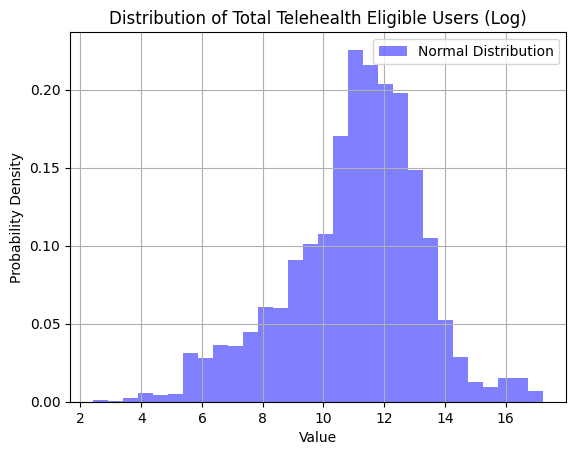

In [32]:
# Visualization
# Used data transformed using log from section 3 "Handling Outliers"
plt.hist(df['log_total_bene_th_elig'], bins=30, density=True, alpha=0.5, color='blue', label='Normal Distribution')
plt.title('Distribution of Total Telehealth Eligible Users (Log)')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()


### total_partb_enrl
"Total Medicare Part B Enrollment"

Represents the total Medicare population with Part B Fee-for-Service (FFS) Insurance.

In [19]:
# Measures of central tendency
mean_partb = df['total_partb_enrl'].mean()
median_partb = df['total_partb_enrl'].median()
mode_partb = df['total_partb_enrl'].mode().iloc[0]
print(f'Mean: {mean_partb} \n Median: {median_partb} \n Mode: {mode_partb}')

Mean: 650160.6333604273 
 Median: 105096.0 
 Mode: 436.0


In [20]:
# Measures of spread
range_partb = df['total_partb_enrl'].max() - df['total_partb_enrl'].min()
variance_partb = df['total_partb_enrl'].var()
std_partb = df['total_partb_enrl'].std()
percentile25_partb = df['total_partb_enrl'].quantile(0.25)
percentile50_partb = df['total_partb_enrl'].quantile(0.5)
percentile75_partb = df['total_partb_enrl'].quantile(0.75)
iqr_partb = percentile75_partb - percentile25_partb
print(f'Range: {range_partb} \n Variance: {variance_partb} \n Standard Deviation: {std_partb}')
print(f'25th Percentile: {percentile25_partb} \n 50th Percentile (Median): {percentile50_partb} \n 75th Percentile {percentile75_partb} \n Interquartile Range: {iqr_partb}')

Range: 32345936.0 
 Variance: 6947105630087.491 
 Standard Deviation: 2635736.2595843105
25th Percentile: 23930.5 
 50th Percentile (Median): 105096.0 
 75th Percentile 343848.0 
 Interquartile Range: 319917.5


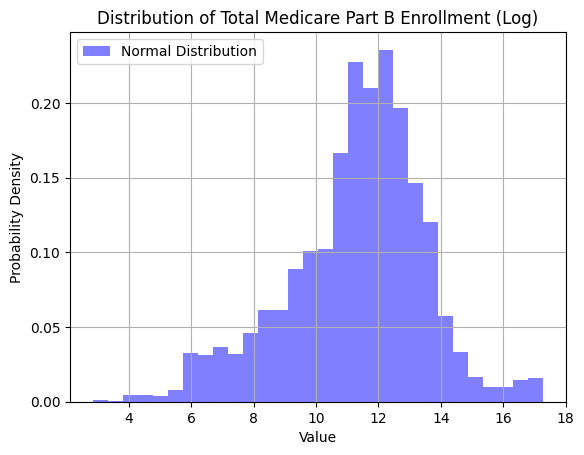

In [33]:
# Visualization
# Used data transformed using log from section 3 "Handling Outliers"
plt.hist(df['log_total_partb_enrl'], bins=30, density=True, alpha=0.5, color='blue', label='Normal Distribution')
plt.title('Distribution of Total Medicare Part B Enrollment (Log)')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()


### total_bene_telehealth
"Total Telehealth Users"

Represents the total number of Medicare beneficiaries with telehealth visit (includes audio-only telehealth visits).

In [21]:
# Measures of central tendency
mean_telehealth = df['total_bene_telehealth'].mean()
median_telehealth = df['total_bene_telehealth'].median()
mode_telehealth = df['total_bene_telehealth'].mode().iloc[0]
print(f'Mean: {mean_telehealth} \n Median: {median_telehealth} \n Mode: {mode_telehealth}')

Mean: 125088.92031849355 
 Median: 15810.0 
 Mode: 23.0


In [22]:
# Measures of spread
range_telehealth = df['total_bene_telehealth'].max() - df['total_bene_telehealth'].min()
variance_telehealth = df['total_bene_telehealth'].var()
std_telehealth = df['total_bene_telehealth'].std()
percentile25_telehealth = df['total_bene_telehealth'].quantile(0.25)
percentile50_telehealth = df['total_bene_telehealth'].quantile(0.5)
percentile75_telehealth = df['total_bene_telehealth'].quantile(0.75)
iqr_telehealth = percentile75_telehealth - percentile25_telehealth
print(f'Range: {range_telehealth} \n Variance: {variance_telehealth} \n Standard Deviation: {std_telehealth}')
print(f'25th Percentile: {percentile25_telehealth} \n 50th Percentile (Median): {percentile50_telehealth} \n 75th Percentile {percentile75_telehealth} \n Interquartile Range: {iqr_telehealth}')

Range: 14826931.0 
 Variance: 325802495871.20233 
 Standard Deviation: 570791.1140436599
25th Percentile: 3783.25 
 50th Percentile (Median): 15810.0 
 75th Percentile 54689.0 
 Interquartile Range: 50905.75


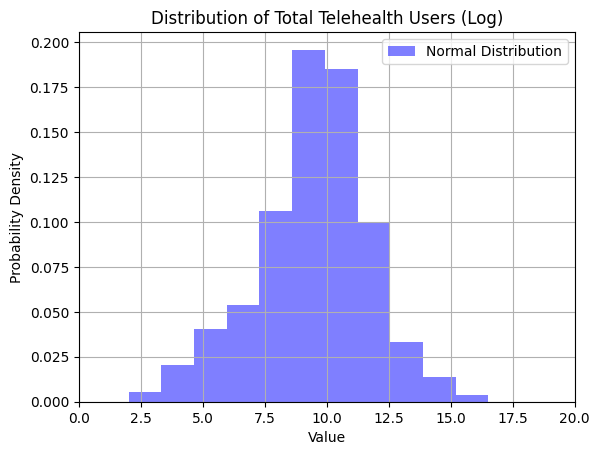

In [34]:
# Visualization
# Used data transformed using log from section 3 "Handling Outliers"
plt.hist(df['log_total_bene_telehealth'], bins=30, density=True, alpha=0.5, color='blue', label='Normal Distribution')

plt.xlim(0,20)

plt.title('Distribution of Total Telehealth Users (Log)')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()


### pct_telehealth
"Percentage of Medicare Users with a Telehealth Service"

Represents the percent of Medicare users with a telehealth service. Calculated by dividing Total Telehealth Users (total_bene_telehealth) by Total Telehealth Eligible Users (total_bene_th_elig).

In [23]:
# Measures of central tendency
mean_pct = df['pct_telehealth'].mean()
median_pct = df['pct_telehealth'].median()
mode_pct = df['pct_telehealth'].mode().iloc[0]
print(f'Mean: {mean_pct} \n Median: {median_pct} \n Mode: {mode_pct}')

Mean: 0.2446041969423938 
 Median: 0.2117 
 Mode: 0.0668


In [24]:
# Measures of spread
range_pct = df['pct_telehealth'].max() - df['pct_telehealth'].min()
variance_pct = df['pct_telehealth'].var()
std_pct = df['pct_telehealth'].std()
percentile25_pct = df['pct_telehealth'].quantile(0.25)
percentile50_pct = df['pct_telehealth'].quantile(0.5)
percentile75_pct = df['pct_telehealth'].quantile(0.75)
iqr_pct = percentile75_pct - percentile25_pct
print(f'Range: {range_pct} \n Variance: {variance_pct} \n Standard Deviation: {std_pct}')
print(f'25th Percentile: {percentile25_pct} \n 50th Percentile (Median): {percentile50_pct} \n 75th Percentile {percentile75_pct} \n Interquartile Range: {iqr_pct}')

Range: 0.8202 
 Variance: 0.020667650874141425 
 Standard Deviation: 0.143762480759555
25th Percentile: 0.1326 
 50th Percentile (Median): 0.2117 
 75th Percentile 0.33185 
 Interquartile Range: 0.19924999999999998


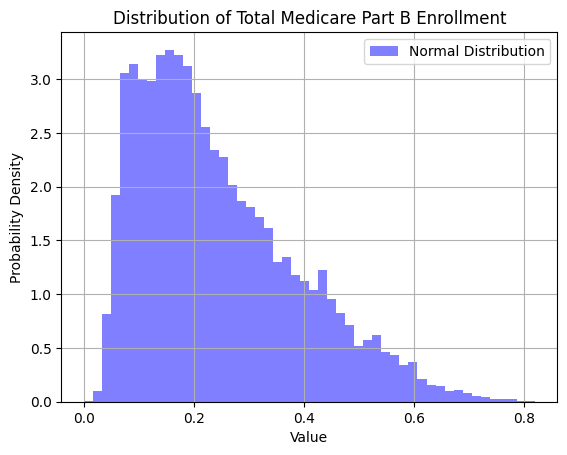

In [35]:
# Visualization
plt.hist(df['pct_telehealth'], bins=50, density=True, alpha=0.5, color='blue', label='Normal Distribution')
plt.title('Distribution of Total Medicare Part B Enrollment')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()


**____________________________________________________________________________________________________________**

# **2. Bivariate Analysis**

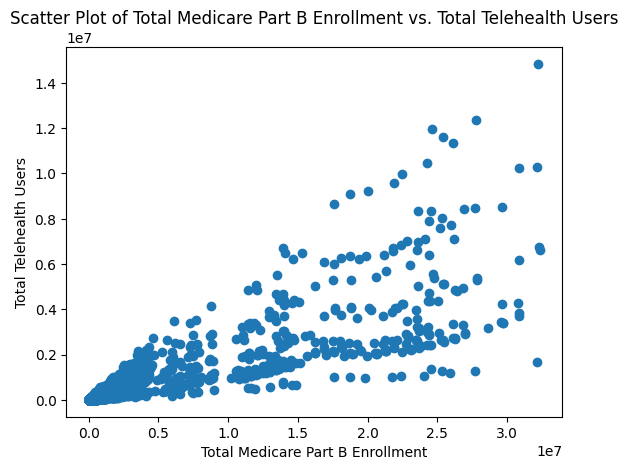

In [39]:
# Created a scatter plot of Total Medicare Part B Enrollment vs. Total Telehealth Users
plt.scatter(df['total_partb_enrl'], df['total_bene_telehealth'])
plt.xlabel('Total Medicare Part B Enrollment')
plt.ylabel('Total Telehealth Users')
plt.title('Scatter Plot of Total Medicare Part B Enrollment vs. Total Telehealth Users')
plt.show()


Spearman Correlation Matrix:
                       total_partb_enrl  total_bene_telehealth
total_partb_enrl               1.000000               0.933309
total_bene_telehealth          0.933309               1.000000


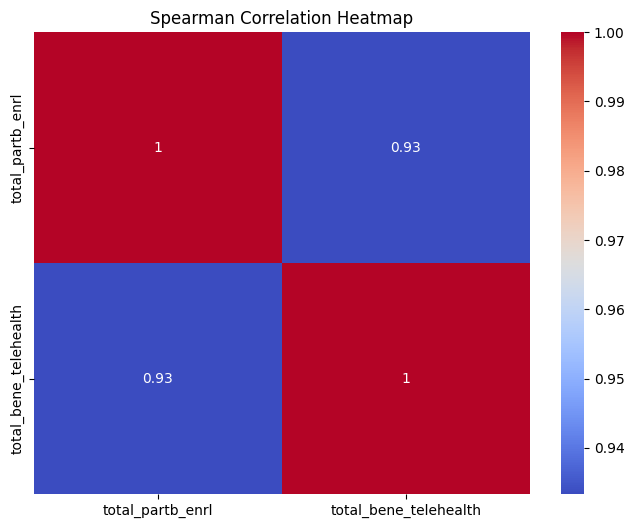

In [47]:
# Used Spearman correlation to measure correlation between Total Medicare Part B Enrollment and Total Telehealth Users
spearman_corr = df[['total_partb_enrl','total_bene_telehealth']].corr(method='spearman')

print("Spearman Correlation Matrix:")
print(spearman_corr)

# Create a heatmap of the Spearman correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm')
plt.title("Spearman Correlation Heatmap")
plt.show()




> **Summary of Heatmap**

Spearman rank correlation was used to analyze the correlation between Total Medicare Part B Enrollment and Total Telehealth Users. Based on the heatmap above, it can be seen that there is a strong positive correlation between the two variables with a strength of 0.933.


**____________________________________________________________________________________________________________**

# **3. Handling Outliers**

Handling outliers in each numerical column

### total_bene_th_elig

Applied log to the values in "total_bene_th_elig" and contained the new values in a new column called "log_elig". This normalized distribution of the data and the histogram.

In [25]:
# Detecting Outliers
threshold_lower = percentile25_elig - 1.5 * iqr_elig
threshold_upper = percentile75_elig + 1.5 * iqr_elig

outliers = [x for x in df['total_bene_th_elig'] if x < threshold_lower or x > threshold_upper]

print("Outliers:", outliers)

Outliers: [1843472.0, 908469.0, 642601.0, 2119055.0, 1887093.0, 1201331.0, 917724.0, 1335517.0, 727038.0, 1392017.0, 1533410.0, 717368.0, 1702208.0, 1634015.0, 958405.0, 743803.0, 1398275.0, 1444008.0, 679370.0, 874708.0, 1008908.0, 823879.0, 805119.0, 797553.0, 654248.0, 703478.0, 20624210.0, 3163071.0, 10407056.0, 7070986.0, 3351317.0, 23992430.0, 5419130.0, 18521196.0, 2971037.0, 13608452.0, 10383978.0, 657700.0, 1405023.0, 815121.0, 2058420.0, 1751809.0, 1221387.0, 837033.0, 996870.0, 1330975.0, 1158910.0, 771600.0, 16966558.0, 2102171.0, 8272108.0, 5949662.0, 2844641.0, 19168582.0, 4753931.0, 14388915.0, 2040684.0, 10867506.0, 8301076.0, 2887191.0, 2012704.0, 1402227.0, 915289.0, 646900.0, 4977120.0, 1213154.0, 3752262.0, 1895825.0, 3006253.0, 1970867.0, 891607.0, 674798.0, 2902503.0, 17737019.0, 1150367.0, 9004829.0, 6155697.0, 2704417.0, 19015310.0, 4205976.0, 14768934.0, 1075212.0, 10602199.0, 8413111.0, 1166813.0, 656177.0, 16266079.0, 650703.0, 737395.0, 727451.0, 1128070.0, 

In [26]:
# Transformed the data using log.
df['log_total_bene_th_elig'] = np.log(df['total_bene_th_elig'])

### total_partb_enrl#

Transformed the values in this column using log to normalize the distribution.

In [27]:
# Detecting Outliers
threshold_lower = percentile25_elig - 1.5 * iqr_partb
threshold_upper = percentile75_elig + 1.5 * iqr_partb

outliers = [x for x in df['total_partb_enrl'] if x < threshold_lower or x > threshold_upper]

print("Outliers:", outliers)

Outliers: [2536430.0, 1345191.0, 823838.0, 2918669.0, 2590252.0, 1591110.0, 1327559.0, 1759298.0, 962555.0, 1956114.0, 1898146.0, 950420.0, 2120457.0, 2030225.0, 1158492.0, 961965.0, 1713843.0, 1804940.0, 748380.0, 883975.0, 1204872.0, 1381856.0, 1122734.0, 768653.0, 1088608.0, 1118261.0, 772855.0, 851666.0, 817747.0, 781595.0, 968133.0, 799412.0, 754564.0, 27673258.0, 4301866.0, 14833158.0, 8952949.0, 4094427.0, 32182399.0, 7494962.0, 24561110.0, 4102255.0, 17603222.0, 14579177.0, 878542.0, 974055.0, 913114.0, 1941259.0, 816362.0, 1173726.0, 2816371.0, 2400773.0, 1557649.0, 1258722.0, 1523047.0, 864275.0, 1972492.0, 1705419.0, 1063629.0, 908864.0, 22389570.0, 2835465.0, 11623146.0, 7436002.0, 3430892.0, 25325506.0, 6559300.0, 18704379.0, 2771193.0, 13926458.0, 11399048.0, 3644858.0, 2571357.0, 1855033.0, 1118698.0, 747702.0, 6292790.0, 1538075.0, 4737902.0, 2453756.0, 3643562.0, 2649228.0, 1123419.0, 897269.0, 3589920.0, 24028400.0, 1730509.0, 12978125.0, 7834251.0, 3346725.0, 2588960

In [28]:
# Applied log
df['log_total_partb_enrl'] = np.log(df['total_partb_enrl'])

### total_bene_telehealth

Transformed the values in this column using log to normalize the distribution.

In [29]:
# Detecting Outliers
threshold_lower = percentile25_elig - 1.5 * iqr_telehealth
threshold_upper = percentile75_elig + 1.5 * iqr_telehealth

outliers = [x for x in df['total_bene_telehealth'] if x < threshold_lower or x > threshold_upper]

print("Outliers:", outliers)

Outliers: [1280549.0, 365839.0, 675701.0, 435615.0, 1665085.0, 1359089.0, 348715.0, 1001349.0, 663736.0, 1034544.0, 529806.0, 359609.0, 1297972.0, 1032393.0, 777437.0, 520535.0, 493310.0, 382743.0, 1045270.0, 549629.0, 362490.0, 1171775.0, 976346.0, 688637.0, 483138.0, 994841.0, 891779.0, 446752.0, 1048037.0, 944917.0, 609761.0, 438276.0, 651333.0, 401418.0, 646619.0, 599127.0, 683371.0, 661199.0, 391970.0, 551727.0, 566845.0, 357632.0, 431439.0, 375657.0, 350201.0, 432873.0, 417049.0, 366567.0, 8457771.0, 1700400.0, 4332321.0, 2905669.0, 1323861.0, 10262251.0, 1921249.0, 8325061.0, 1603771.0, 5990903.0, 4271348.0, 623679.0, 366239.0, 956470.0, 844598.0, 597341.0, 359129.0, 445705.0, 628656.0, 563263.0, 380952.0, 6838066.0, 1141354.0, 3386703.0, 2404242.0, 1099894.0, 8032193.0, 1671925.0, 6351189.0, 1108869.0, 4669235.0, 3362958.0, 1369986.0, 1122835.0, 700857.0, 430671.0, 2531441.0, 535865.0, 1990693.0, 1061847.0, 1570701.0, 960740.0, 441094.0, 353785.0, 1473718.0, 7087785.0, 577565.0

In [30]:
# Applied log. The variable 'epsilon' was used to avoid dividing by zero.
epsilon = 1e-10
df['log_total_bene_telehealth'] = np.log(df['total_bene_telehealth'] + epsilon)

### pct_telehealth

Outliers was detected in this column, however, I decided to include the outliers because because they might provide valuable information. Log was not applied in this case because the output became negative.

In [31]:
threshold_lower = percentile25_elig - 1.5 * iqr_pct
threshold_upper = percentile75_elig + 1.5 * iqr_pct

outliers = [x for x in df['pct_telehealth'] if x < threshold_lower or x > threshold_upper]

print("Outliers:", outliers)

Outliers: [0.0507, 0.0772, 0.053, 0.0505, 0.0443, 0.0554, 0.0487, 0.0583, 0.0784, 0.061, 0.0603, 0.0488, 0.0658, 0.042, 0.0553, 0.0498, 0.0556, 0.0594, 0.0544, 0.0675, 0.1321, 0.0697, 0.0652, 0.0606, 0.0758, 0.078, 0.0746, 0.1327, 0.0862, 0.0806, 0.0703, 0.1062, 0.0507, 0.0878, 0.0749, 0.0714, 0.1068, 0.0655, 0.057, 0.1168, 0.0591, 0.0565, 0.0526, 0.0617, 0.0477, 0.0641, 0.1186, 0.1024, 0.0655, 0.0569, 0.0486, 0.0501, 0.0837, 0.066, 0.0616, 0.0895, 0.0581, 0.0405, 0.0826, 0.041, 0.0396, 0.0422, 0.0472, 0.0495, 0.0453, 0.0847, 0.0484, 0.0503, 0.0431, 0.0562, 0.0346, 0.0551, 0.0428, 0.0465, 0.0781, 0.0396, 0.0866, 0.1255, 0.0899, 0.0869, 0.0782, 0.0915, 0.0739, 0.0937, 0.1272, 0.1054, 0.0964, 0.0851, 0.0943, 0.0825, 0.1118, 0.0846, 0.0931, 0.1042, 0.0848, 0.074, 0.152, 0.0774, 0.0706, 0.0708, 0.0835, 0.0663, 0.0888, 0.1535, 0.127, 0.0894, 0.0761, 0.0821, 0.0691, 0.1035, 0.0844, 0.083, 0.1217, 0.0752, 0.0752, 0.1542, 0.0848, 0.0753, 0.058, 0.0867, 0.0795, 0.0871, 0.1553, 0.1122, 0.091, 0.

**____________________________________________________________________________________________________________**

# **4. Automated Analysis**

Output of the automatic analysis is saved in file named automatic_eda_report.html

In [36]:
report = ProfileReport(df)
report.to_file('automatic_eda_report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]